In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import sys
sys.path.append('/Users/dzhansavarmail.ru/Desktop/artefakt/ct_simulation-main/src/CT_simulation')
import gen_and_deg
from gen_and_deg import *

In [4]:
def normalize_image(image):
    """Нормализация изображения для визуализации"""
    return (image - np.min(image)) / (np.max(image) - np.min(image))

In [8]:
n = 128
theta = np.linspace(0., 180., n, endpoint=False)
sigma = 1e-1
max_p = 1e5

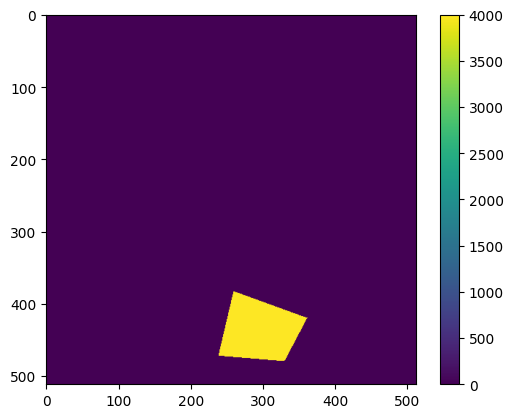

In [7]:
hu_matrix1 = generate(num_vertices=5)
plt.imshow(hu_matrix1, cmap='viridis')
plt.colorbar()
plt.show()

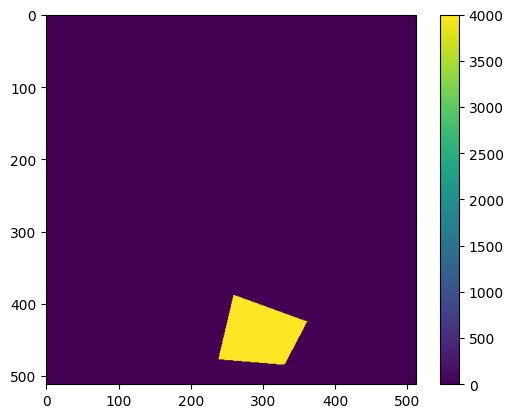

In [28]:
new_matrix = np.zeros((512, 512))
for i in range(512):
    for j in range(512):
        if hu_matrix1[i][j] > 0.:
            new_matrix[i+5][j] = hu_matrix1[i][j]
plt.imshow(new_matrix, cmap='viridis')
plt.colorbar()
plt.show()

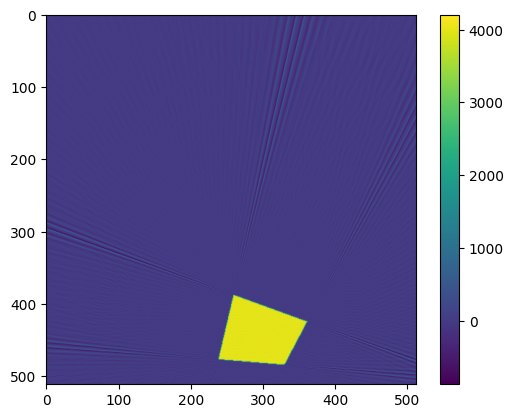

In [29]:
hu_matrix2 = degradation(new_matrix, theta=theta, max_p=1e6)
plt.imshow(hu_matrix2, cmap='viridis')
plt.colorbar()
plt.show()

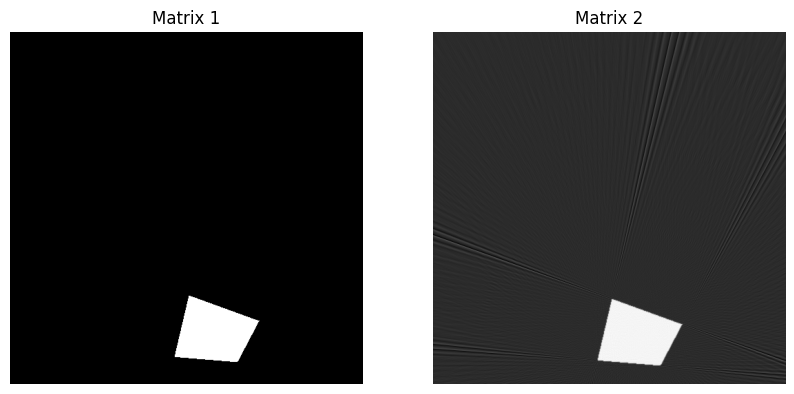

Косинусное сходство: 0.9605
Евклидово расстояние: 140526.25


In [33]:
# Визуализация изображений
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(normalize_image(hu_matrix1), cmap='gray')
plt.title('Matrix 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalize_image(hu_matrix2), cmap='gray')
plt.title('Matrix 2')
plt.axis('off')

plt.show()

# Преобразование матриц в векторы
vector1 = hu_matrix1.flatten()
vector2 = hu_matrix2.flatten()

# Проверка размерности векторов
if vector1.shape != vector2.shape:
    raise ValueError("Матрицы имеют разный размер!")

# Сравнение матриц
cosine_sim = (cosine_similarity([vector1], [vector2])[0][0] + 1) / 2
print(f"Вероятность сходства: {cosine_sim:.4f}")

euclidean_dist = np.linalg.norm(vector1 - vector2)
print(f"Евклидово расстояние: {euclidean_dist:.2f}")